# auto feature nyc taxi

## Introduction 

This demos intended to:
1. Show case RecDp AutoFE capabilites on NYC Taxi fare prediction workloads. 
2. Quick glance of RecDP AutoFE API 
3. Performance 


## 1. Load Datasets

In [1]:
import pandas as pd
train_data = pd.read_csv(f"/home/vmagent/app/recdp/dataset/nyc_taxi_fare/nyc_taxi_fare_cleaned.csv")
print("original input is ")
display(train_data)
train_data.dtypes

original input is 


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
54315950,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
54315951,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
54315952,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
54315953,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## 2. Intelligent Pipeline Manager - Feature Wrangler 

1. RecDP will automatically schema_infer each column, identify text from string, coordination from float. 
2. Then RecDP will do data clean (data profiler) 
    * i.e., fillNA, currently we can handle default for datetime, string, numerical -int, float. 
    * i.e., missing value impute 
3. Then RecDp will do feature engineering automatically (feature wrangler) 
    * call different primitives based on data type
    * i.e., decode text tokens 
    * We will use AutoFE to generate new additional features 
    * date time -> week of year, month, .... 
    * text -> count unique value
4. Drop features - get data ready for train 
    * drop duplicated features 
    * transformer features which not ready for training -> categorify 

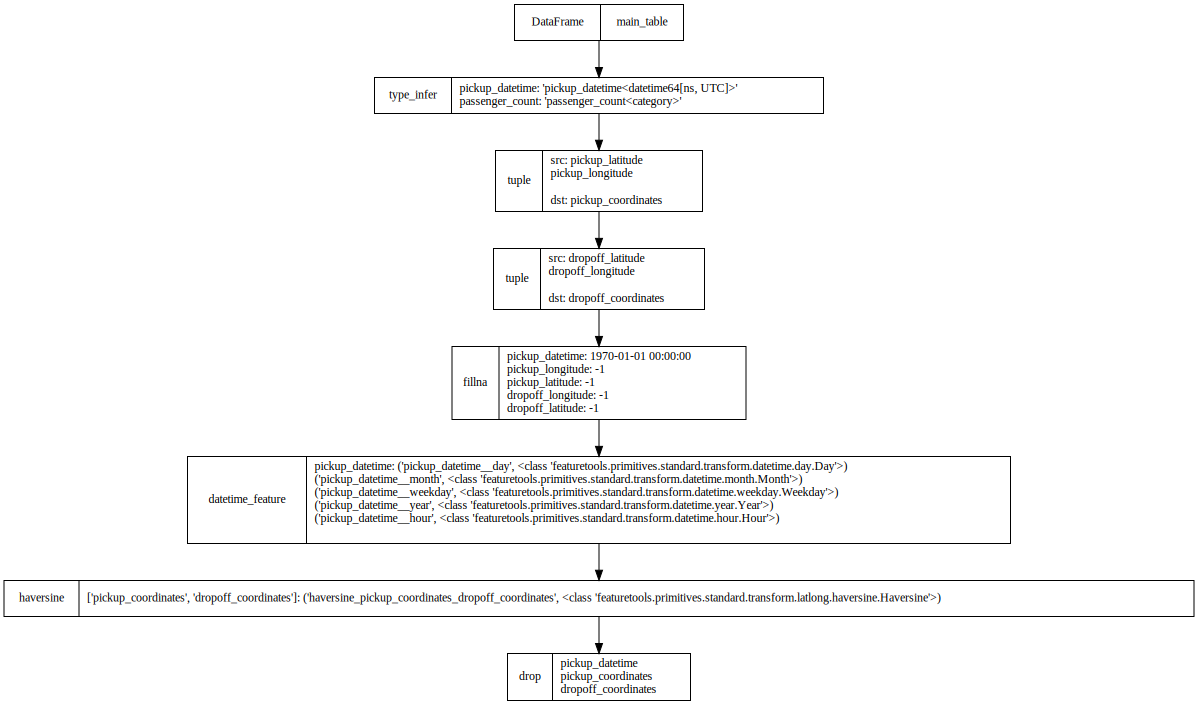

In [2]:
from pyrecdp.autofe import FeatureWrangler

pipeline = FeatureWrangler(dataset=train_data, label="fare_amount")
pipeline.plot()

## 3. pipeline runner

### convert pipeline to pandas and execute

In [3]:
transformed_data = pipeline.fit_transform('pandas')

execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 6.810296326875687e-06 sec
execute type_infer started ...
  execute type_infer took 787.6533693810925 sec
execute tuple started ...
  execute tuple took 204.99868819629773 sec
execute tuple started ...
  execute tuple took 209.62503393692896 sec
execute fillna started ...
  execute fillna took 6.543735394719988 sec
execute datetime_feature started ...
  execute datetime_feature took 23.681080408859998 sec
execute haversine started ...
  execute haversine took 33.91048765182495 sec
execute drop started ...
  execute drop took 2.0341719100251794 sec
execute with pandas took 1268.4477621940896 sec


### convert pipeline to spark and execute

In [4]:
transformed_data = pipeline.fit_transform('spark')

Will assign 48 cores and 308513 M memory for spark
23/03/03 09:23:12 WARN Utils: Your hostname, sr419 resolves to a loopback address: 127.0.1.1; using 10.0.2.19 instead (on interface ens818f1)
23/03/03 09:23:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/03 09:23:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
per core memory size is 6.277 GB and shuffle_disk maximum capacity is 8589934592.000 GB
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 63.677 secs
append tuple
append tuple
append fillna
append datetime_feature
append haversine
append drop
append RDDToDataFrameConverter
execute with spark started ...
23/03/03 09:24:20 WARN TaskSetManager: Stage 0 contains a task of very large size (153842 KiB). The maximum recommended task size is 1000 KiB.


DataframeTransform took 54.720 secs, processed 54315955 rows with num_partitions as 200
DataframeTransform combine to one pandas dataframe took 3.211 secs
execute with spark took 58.037869622930884 sec


In [5]:
display(transformed_data)
transformed_data.dtypes

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime__day,pickup_datetime__month,pickup_datetime__weekday,pickup_datetime__year,pickup_datetime__hour,haversine_pickup_coordinates_dropoff_coordinates
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,6,0,2009,17,0.640488
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,1,2010,16,5.250677
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,3,2011,0,0.863412
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,5,2012,4,1.739388
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,1,2010,7,1.242220
...,...,...,...,...,...,...,...,...,...,...,...,...
54315950,14.0,-74.005272,40.740027,-73.963280,40.762555,1,15,3,5,2014,3,2.693273
54315951,4.2,-73.957784,40.765530,-73.951640,40.773959,1,24,3,1,2009,20,0.665235
54315952,14.1,-73.970505,40.752325,-73.960537,40.797342,1,2,4,5,2011,22,3.153803
54315953,28.9,-73.980901,40.764629,-73.870605,40.773963,1,26,10,2,2011,5,5.807441


fare_amount                                          float64
pickup_longitude                                     float64
pickup_latitude                                      float64
dropoff_longitude                                    float64
dropoff_latitude                                     float64
passenger_count                                     category
pickup_datetime__day                                   int64
pickup_datetime__month                                 int64
pickup_datetime__weekday                               int64
pickup_datetime__year                                  int64
pickup_datetime__hour                                  int64
haversine_pickup_coordinates_dropoff_coordinates     float64
dtype: object

## 4. export pipeline

In [6]:
pipeline.export()

0
	{'children': None, 'op': 'DataFrame', 'config': 'main_table'}
1
	{'children': [0], 'op': 'type_infer', 'config': {'pickup_datetime': 'pickup_datetime<datetime64[ns, UTC]>', 'passenger_count': 'passenger_count<category>'}}
2
	{'children': [1], 'op': 'tuple', 'config': {'src': ['pickup_latitude', 'pickup_longitude'], 'dst': 'pickup_coordinates'}}
3
	{'children': [2], 'op': 'tuple', 'config': {'src': ['dropoff_latitude', 'dropoff_longitude'], 'dst': 'dropoff_coordinates'}}
4
	{'children': [3], 'op': 'fillna', 'config': {'pickup_datetime': Timestamp('1970-01-01 00:00:00'), 'pickup_longitude': -1, 'pickup_latitude': -1, 'dropoff_longitude': -1, 'dropoff_latitude': -1}}
5
	{'children': [4], 'op': 'datetime_feature', 'config': {'pickup_datetime': [('pickup_datetime__day', <class 'featuretools.primitives.standard.transform.datetime.day.Day'>), ('pickup_datetime__month', <class 'featuretools.primitives.standard.transform.datetime.month.Month'>), ('pickup_datetime__weekday', <class 'featureto

# Estimator

In [3]:
from utils import Timer
import pandas as pd
from sklearn.metrics import mean_squared_error
import lightgbm as lgbm
import numpy as np
           
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':2000,
        'num_boost_round': 2000,
        'early_stopping_rounds': 50
    }

with Timer("split data"):
    test_sample = ret.sample(frac = 0.1)
    train_sample = ret.drop(test_sample.index)

with Timer("prepare train and validate for lgbm"):
    x_train = train_sample.drop(columns=['fare_amount'])
    y_train = train_sample['fare_amount'].values

    x_val = test_sample.drop(columns=['fare_amount'])
    y_val = test_sample['fare_amount'].values

    lgbm_train = lgbm.Dataset(x_train, y_train, silent=False)
    lgbm_val = lgbm.Dataset(x_val, y_val, silent=False)

with Timer("train"):
    model = lgbm.train(params=params, train_set=lgbm_train, valid_sets=lgbm_val, verbose_eval=100)
    
with Timer("predict"):
    pred = model.predict(x_val, num_iteration=model.best_iteration)
    
with Timer("calculate rmse"):
    rmse = np.sqrt(mean_squared_error(y_val, pred))

print('LightGBM RMSE', rmse)

split data took 18.846782117150724 sec
prepare train and validate for lgbm took 1.839367987588048 sec


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warni

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.394878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25091
[LightGBM] [Info] Number of data points in the train set: 48884359, number of used features: 11


/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 11.324507
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3.92054
[200]	valid_0's rmse: 3.80928
[300]	valid_0's rmse: 3.74226
[400]	valid_0's rmse: 3.70658
[500]	valid_0's rmse: 3.68103
[600]	valid_0's rmse: 3.65886
[700]	valid_0's rmse: 3.64397
[800]	valid_0's rmse: 3.62826
[900]	valid_0's rmse: 3.61487
[1000]	valid_0's rmse: 3.60162
[1100]	valid_0's rmse: 3.59362
[1200]	valid_0's rmse: 3.58307
[1300]	valid_0's rmse: 3.57557
[1400]	valid_0's rmse: 3.56744
[1500]	valid_0's rmse: 3.56027
[1600]	valid_0's rmse: 3.55456
[1700]	valid_0's rmse: 3.54906
[1800]	valid_0's rmse: 3.54471
[1900]	valid_0's rmse: 3.5408
[2000]	valid_0's rmse: 3.53851
Did not meet early stopping. Best iteration is:
[1997]	valid_0's rmse: 3.53851
train took 1506.3177826348692 sec
predict took 338.8403431503102 sec
calculate rmse